In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [47]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

prices_recommended = [440, 495, 380,  67, 919, 635,  79, 126,   4, 234]
prices_bought = [831, 155, 440, 67]

### 1. Hit rate

Hit rate = был ли хотя бы 1 релевантный товар среди рекомендованных

- Иногда применяется, когда продаются достаточно дорогие товары (например, бытовая техника) 

----
Hit rate = (был ли хотя бы 1 релевантный товар среди рекомендованных)   

Hit rate@k = (был ли хотя бы 1 релевантный товар среди топ-k рекомендованных)

In [8]:
def hit_rate(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    result = int(flags.sum() > 0)
    
    return result


def hit_rate_at_k(recommended_list, bought_list, k=5):
    result = hit_rate(recommended_list[:k], bought_list)
    return result

In [15]:
# Пример для 0 хитрейта при К

recommended_list_2 = [111, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров

In [24]:
hit_rate_at_k(recommended_list_2, bought_list, k=2)

0

*Какое должно быть K чтобы значение получилось равным 1?*

In [23]:
K = 4

assert hit_rate_at_k(recommended_list_2, bought_list, k=K) == 1

hit_rate_at_k(recommended_list_2, bought_list, k=K)

1

### 2. Precision

*Precision* - доля релевантных товаров среди рекомендованных = Какой % рекомендованных товаров  юзер купил

- Пожалуй, самая приближенная к бизнес-метрикам и самая популярная метрика

---

Precision= (# of recommended items that are relevant) / (# of recommended items)  

Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)

Money Precision@k = (revenue of recommended items @k that are relevant) / (revenue of recommended items @k)  

**Note:** Обычно k в precision@k достаточно невелико (5-20) и определяется из бизнес-логики. Например, 5 товаров в e-mail рассылке, 10 ответов на первой странице поиска и т.д

Красная рыба - 400 руб  
Молоко - 60 руб  
Хлеб = 40 руб  
Гречка = 40 руб  
Шоколад = 90 руб  

------  
Варенье - 240 руб  
...  

**Case 1**  
prices_resommended = [400, 60, 40, 40 , 90]  
flags = [1, 0, 0, 0 , 1]  

$precison@5 = \frac{1 + 0 + 0 +0 + 1}{1+1+1+1+1} = 40\%$  
$money precision@5 = \frac{1*400 + 0*60 + ... + 1*90}{1*400 + 1*60 + ... + 1*90} = 77.7\%$  

  
**Case 2**   
prices_resommended = [400, 60, 40, 40 , 90]  
flags = [0, 1, 0, 0 , 1]  

$precison@5 = \frac{0 + 1 + 0 +0 + 1}{1+1+1+1+1} = 40\%$  
$money precision@5 = \frac{0*400 + 1*60 + ... + 1*90}{1*400 + 1*60 + ... + 1*90} = 15.8\%$

In [52]:
def precision(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    return precision


def precision_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    
    return precision


def money_precision_at_k(recommended_list, bought_list, prices_recommended, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    prices_recommended = np.array(prices_recommended)[:k]
    flags = np.isin(recommended_list, bought_list)
    
    result = flags @ prices_recommended / prices_recommended.sum()
    
    return result

In [54]:
money_precision_at_k(recommended_list, bought_list, prices_recommended)

0.22033898305084745

---

In [37]:
K = 3

assert np.isclose(precision_at_k(recommended_list, bought_list, k=K), 0.333, atol=1e-3)

precision_at_k(recommended_list, bought_list, k=K)

0.3333333333333333

In [38]:
(recommended_list[:K], bought_list)

([143, 156, 1134], [521, 32, 143, 991])

In [39]:
assert precision(recommended_list, bought_list) == precision_at_k(recommended_list, bought_list, k=len(recommended_list))

In [40]:
K = 5

assert np.isclose(precision_at_k(recommended_list, bought_list, k=K), 0.4, atol=1e-3)

precision_at_k(recommended_list, bought_list, k=K)

0.4

In [41]:
(recommended_list[:K], bought_list)

([143, 156, 1134, 991, 27], [521, 32, 143, 991])

In [ ]:
prices_recommended[:5]

---

In [56]:
K = 3

assert np.isclose(money_precision_at_k(recommended_list, bought_list, prices_recommended, k=K), 0.3346, atol=1e-4)

money_precision_at_k(recommended_list, bought_list, prices_recommended, k=K)

0.33460076045627374

*Как будет изменяться precision и money precision в зависимости от K?*

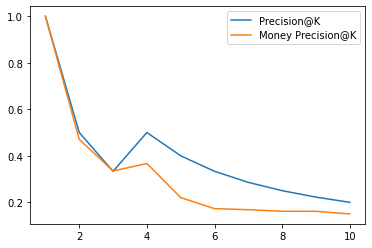

In [58]:
pr_range = list()
money_pr_range = list()

linspace = range(1, len(recommended_list) + 1)

for i in linspace:
    pr_range.append(precision_at_k(recommended_list, bought_list, k=i))
    money_pr_range.append(money_precision_at_k(recommended_list, bought_list, prices_recommended, k=i))
    
plt.plot(linspace, pr_range, label='Precision@K')
plt.plot(linspace, money_pr_range, label='Money Precision@K')
plt.legend()
plt.show()

### 3. Recall

*Recall* - доля рекомендованных товаров среди релевантных = Какой % купленных товаров был среди рекомендованных

- Обычно используется для моделей пре-фильтрации товаров (убрать те товары, которые точно не будем рекомендовать)

---

Recall= (# of recommended items that are relevant) / (# of relevant items)  

Recall@k = (# of recommended items @k that are relevant) / (# of relevant items)

Money Recall@k = (revenue of recommended items @k that are relevant) / (revenue of relevant items)  

    
  
**Note:** в recall@k число k обычно достаточно большое (50-200), больше чем покупок у среднестатистического юзера

In [91]:
def recall(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall


def recall_at_k(recommended_list, bought_list, k=5):
    
    return recall(recommended_list[:k], bought_list)


def money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5):
    
    prices_bought = np.array(prices_bought)
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    prices_recommended = np.array(prices_recommended)[:k]
    
    
    flags = np.isin(bought_list, recommended_list)
    
    return flags @ prices_bought / prices_bought.sum()

In [92]:
recall(recommended_list, bought_list)

0.5

In [93]:
(recommended_list, bought_list)

([143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43], [521, 32, 143, 991])

---

In [94]:
assert recall(recommended_list, bought_list) == recall_at_k(recommended_list, bought_list, k=len(recommended_list))

In [95]:
K = 3

assert np.isclose(recall_at_k(recommended_list, bought_list, k=K), 0.25)

recall_at_k(recommended_list, bought_list, k=K)

0.25

In [96]:
(recommended_list[:K], bought_list)

([143, 156, 1134], [521, 32, 143, 991])

In [97]:
K = 5

assert recall_at_k(recommended_list, bought_list, k=K) == 0.5

recall_at_k(recommended_list, bought_list, k=K)

0.5

In [98]:
(recommended_list[:K], bought_list)

([143, 156, 1134, 991, 27], [521, 32, 143, 991])

---

In [99]:
recommended_list[:3], bought_list, prices_bought, prices_recommended

([143, 156, 1134],
 [521, 32, 143, 991],
 [831, 155, 440, 67],
 [440, 495, 380, 67, 919, 635, 79, 126, 4, 234])

In [101]:
K = 3

assert np.isclose(money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=K), 0.2947, atol=1e-4)

money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=K)

0.29470864032150035

*Мы уже видели как изменяется Precision в зависимости от К, будет ли отличаться график зависимости Recall от K?*

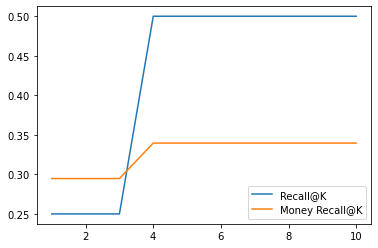

In [102]:
recall_range = list()
money_recall_range = list()

linspace = range(1, len(recommended_list) + 1)

for i in linspace:
    recall_range.append(recall_at_k(recommended_list, bought_list, k=i))
    money_recall_range.append(money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=i))
    
plt.plot(linspace, recall_range, label='Recall@K')
plt.plot(linspace, money_recall_range, label='Money Recall@K')
plt.legend()
plt.show()

#### 4. F1-score

F1 score - это метрика, отражающая баланс между precision и recall. Это среднее гармоническое значение precision и recall.

$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [103]:
def f1_score_at_k(recommended_list, bought_list, k=5):  
    
    p_at_k = precision_at_k(recommended_list, bought_list, k)
    r_at_k = recall_at_k(recommended_list, bought_list, k)
    
    return 2 * p_at_k * r_at_k / (p_at_k + r_at_k)

In [104]:
K = 3

assert np.isclose(f1_score_at_k(recommended_list, bought_list, k=K), 0.285, atol=1e-3)

f1_score_at_k(recommended_list, bought_list, k=K)

0.28571428571428575

In [105]:
K = 5

assert np.isclose(f1_score_at_k(recommended_list, bought_list, k=K), 0.444, atol=1e-3)

f1_score_at_k(recommended_list, bought_list, k=K)

0.4444444444444445

В случае если у нас нет значения K, то F1 score считается для k = min(len(recommended_list), N), где N номер элемента, который включает в себя последний релевантный элемент из всех.

# Метрики ранжирования

Если важен порядок рекомендаций. Подробнее можно почитать [здесь](https://habr.com/ru/company/econtenta/blog/303458/). Формулы в статье могут несколько отличаться от формул в лекции 

## AP@k
AP@k - average precision at k

$$AP@k = \frac{1}{r} \sum{[recommended_{relevant_i}] * precision@k}$$

- r - кол-во релевантный среди рекомендованных
- Суммируем по всем релевантным товарам
- Зависит от порядка реокмендаций

In [32]:
np.isin(recommended_list, bought_list)

array([ True, False, False,  True, False, False, False, False, False,
       False])

In [109]:
def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(k):
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i+1)            
            sum_ += p_k
            
    result = sum_ / min(len(recommended_list), k)
    
    return result

In [110]:
recommended_list, bought_list

([143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43], [521, 32, 143, 991])

In [111]:
# assert np.isclose(ap_k(recommended_list, bought_list, k=5), 0.166, atol=1e-3)

ap_k(recommended_list, bought_list, k=5)

0.3

In [35]:
(recommended_list, bought_list)

([143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43], [521, 32, 143, 991])

### MAP@k

MAP@k (Mean Average Precision@k)  
Среднее AP@k по всем юзерам
- Показывает средневзвешенную точность рекомендаций

$$MAP@k = \frac{1}{|U|} \sum_u{AP_k}$$
  
|U| - кол-во юзеров

In [112]:
recommended_list_list = [recommended_list, recommended_list_2]
bought_list_list = [bought_list, bought_list]

In [113]:
recommended_list_list

[[143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43],
 [111, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43]]

In [116]:
def map_k(recommended_list_list, bought_list_list, k=5):
    recommended_list_list = np.array(recommended_list_list)
    bought_list_list = np.array(bought_list_list)
    
    ap_s = [ap_k(rec, bought, k) for rec, bought in zip(recommended_list_list, bought_list_list)]
    
    
    return sum(ap_s) / len(recommended_list_list)

In [117]:
K = 1

assert np.isclose(map_k(recommended_list_list, bought_list_list, k=K), 0.5, atol=1e-3)

map_k(recommended_list_list, bought_list_list, k=K)

0.5

In [118]:
K = 5

assert np.isclose(map_k(recommended_list_list, bought_list_list, k=K), 0.175, atol=1e-3)

map_k(recommended_list_list, bought_list_list, k=K)

0.175

### AUC@k
AUC для первых k наблюдений  
- Можно посчитать как sklern.metrics.roc_auc_score для топ-k предсказаний
- Показывает долю верно отранжированных товаров

### NDCG@k
Normalized discounted cumulative gain

$$DCG = \frac{1}{|r|} \sum_u{\frac{[bought fact]}{discount(i)}}$$  

$discount(i) = 1$ if $i <= 2$,   
$discount(i) = log_2(i)$ if $i > 2$


(!) Считаем для первых k рекоммендаций   
(!) - существуют вариации с другими $discount(i)$  
i - ранк рекомендованного товара  
|r| - кол-во рекомендованных товаров 

$$NDCG = \frac{DCG}{ideal DCG}$$


In [40]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

$DCG@5 = \frac{1}{5}*(1 / 1 + 0 / 2 + 0 / log(3) + 1 / log(4) + 0 / log(5))$  
$ideal DCG@5 = \frac{1}{5}*(1 / 1 + 1 / 2 + 1 / log(3) + 1 / log(4) + 1 / log(5))$  

$NDCG = \frac{DCG}{ideal DCG}$

### MRR@k
Mean Reciprocal Rank

- Считаем для первых k рекоммендаций
- Найти ранк первого релевантного предсказания $k_u$
- Посчитать reciprocal rank = $\frac{1}{k_u}$

$$MRR = mean(\frac{1}{k_u})$$

In [126]:
a = np.array([0, 0, 1, 1])

a.tolist().index(1)

2

In [134]:
def reciprocal_rank(recommended_list, bought_list):
    
    recommended_list = np.array(recommended_list)
    bought_list = np.array(bought_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    idx = flags.tolist().index(1) + 1

    return 1 / idx

def reciprocal_rank_at_k(recommended_list, bought_list, k):
    
    result = reciprocal_rank(recommended_list[:k], bought_list)
    
    return result

In [135]:
assert np.isclose(reciprocal_rank(recommended_list, bought_list), 1.)

reciprocal_rank(recommended_list, bought_list)

1.0

*Каким будет MRR для второго списка рекомендаций?*

In [136]:
(recommended_list_2, bought_list)

([111, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43], [521, 32, 143, 991])

In [137]:
reciprocal_rank(recommended_list_2, bought_list)

0.25

Homework:
 - [Pylint](https://pylint.pycqa.org/en/latest/tutorial.html)
 - [Pep 8 [Ru]](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html)

Light version:

- [Recommender system introduction](https://www.iteratorshq.com/blog/an-introduction-recommender-systems-9-easy-examples)
- [Google guides](https://developers.google.com/machine-learning/recommendation)

Hard version:

- [Recommender systems [ML Compendium]](https://book.mlcompendium.com/recommender-systems)